# Assignment 1: End-to-End Data Science Project

Author: Kalhar Mayurbhai Patel

This notebook follows the requested structure and uses the **Diabetes** dataset bundled with scikit‑learn so it runs anywhere — no internet or external downloads required.

## Part 1 — Dataset Selection (Kaggle)
- **Titanic - Machine Learning from Disaster**  
  *Why interesting:* Great starter classification with mixed data types; perfect for feature engineering.  
  *What to build:* Logistic Regression, RandomForest; imputation & one‑hot encoding.
- **House Prices - Advanced Regression Techniques**  
  *Why interesting:* Rich tabular dataset; ideal for pipelines, regularization, and feature engineering.  
  *What to build:* ElasticNet, Gradient Boosting or XGBoost; cross‑validation & stacking.
- **Digit Recognizer (MNIST)**  
  *Why interesting:* Simple image classification to learn CNNs and augmentation.  
  *What to build:* TensorFlow/PyTorch CNNs; accuracy & confusion matrix.
- **Heart Disease UCI**  
  *Why interesting:* Interpretable clinical dataset; practice ROC/AUC and calibration.  
  *What to build:* LogReg, tree ensembles; handle class imbalance.

**Chosen here for reproducibility:** **scikit‑learn Diabetes** — Regression (predict disease progression).


## Part 2 — Data Exploration & Preprocessing

In [1]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

bunch = load_diabetes(as_frame=True)
df = bunch.frame.copy()
df.rename(columns={"target": "disease_progression"}, inplace=True)
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:

print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary statistics:")
display(df.describe().T)
print("\nMissing values:")
miss = df.isna().sum().to_frame("missing_count")
miss["missing_pct"] = (miss["missing_count"] / len(df) * 100).round(3)
display(miss)


Shape: (442, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612



Missing values:


,missing_count,missing_pct
age,0,0.0
sex,0,0.0
bmi,0,0.0
bp,0,0.0
s1,0,0.0
s2,0,0.0
s3,0,0.0
s4,0,0.0
s5,0,0.0
s6,0,0.0


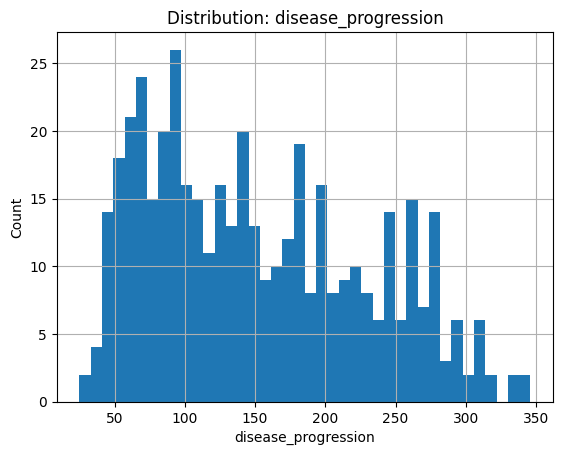

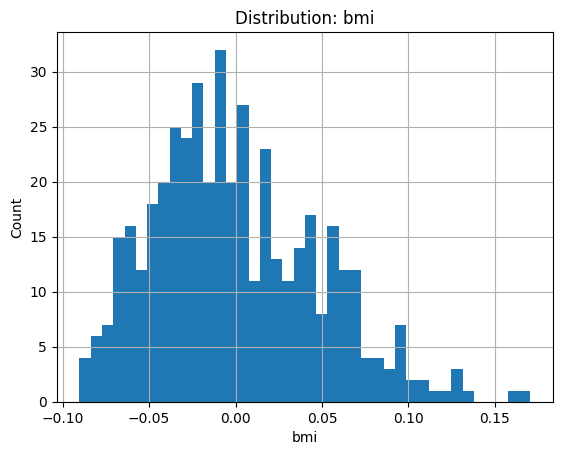

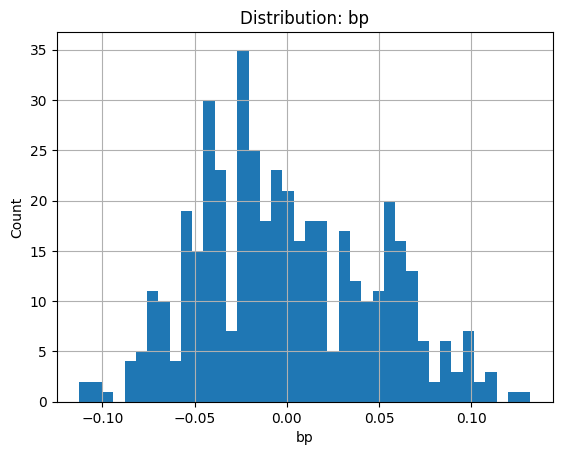

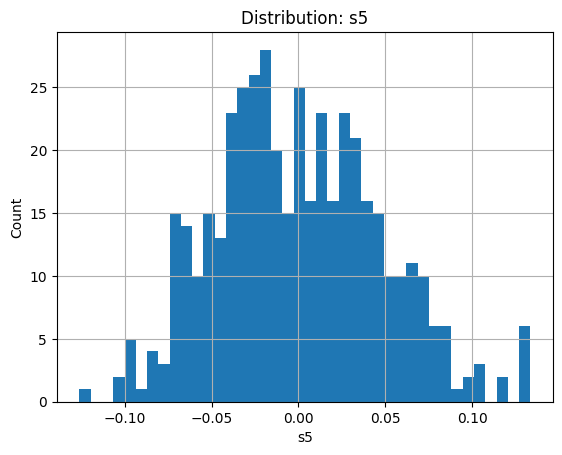

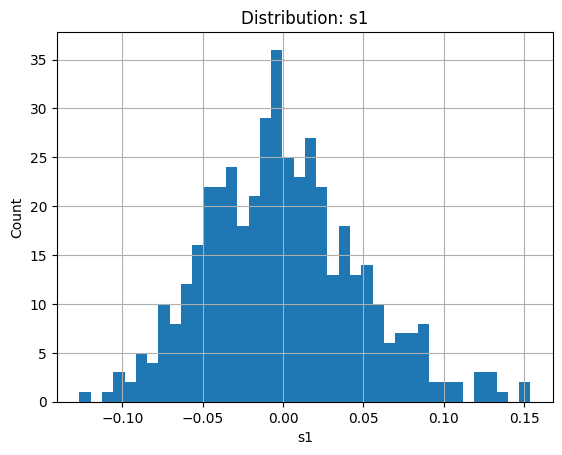

In [3]:

# Key distributions
for col in ['disease_progression', 'bmi', 'bp', 's5', 's1']:
    plt.figure()
    df[col].hist(bins=40)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


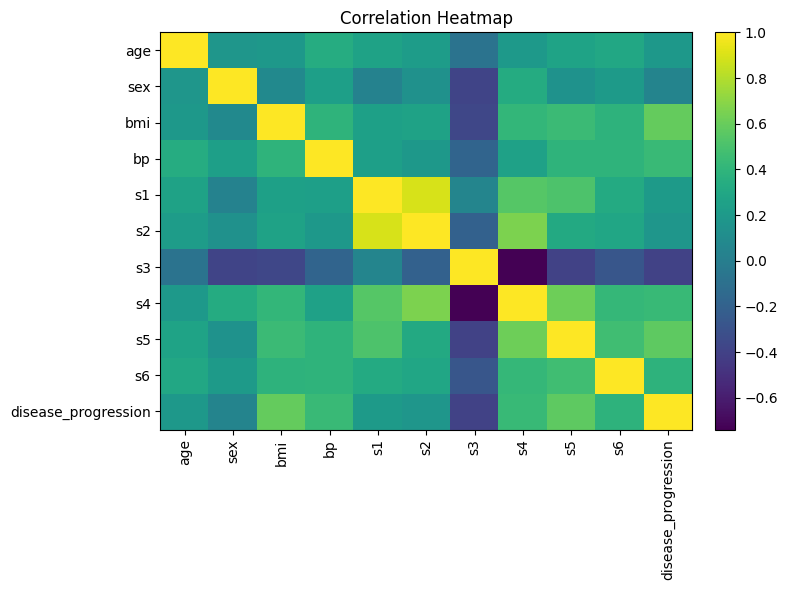

In [4]:

# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
im = plt.imshow(corr.values, aspect="auto")
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(df.columns)), labels=df.columns)
plt.title("Correlation Heatmap")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


## Part 3 — Modeling
We'll compare a linear baseline, a tree ensemble, and a neural‑network‑style MLP on the regression task.

In [5]:

X = df.drop(columns=["disease_progression"])
y = df["disease_progression"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []
def evaluate_and_append(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    from math import sqrt
    mae = mean_absolute_error(y_test, preds)
    rmse = sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append({'model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})
    return preds

lin = Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())])
_ = evaluate_and_append("LinearRegression (scaled)", lin)

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_preds = evaluate_and_append("RandomForestRegressor", rf)

mlp = Pipeline([("scaler", StandardScaler()),
                ("model", MLPRegressor(hidden_layer_sizes=(64,32), early_stopping=True, max_iter=500, random_state=42))])
_ = evaluate_and_append("MLPRegressor (64,32)", mlp)

pd.DataFrame(results).sort_values("RMSE")


,model,MAE,RMSE,R2
0,LinearRegression (scaled),42.794095,53.853446,0.452603
1,RandomForestRegressor,44.276124,54.461217,0.440178
2,"MLPRegressor (64,32)",48.160569,60.470598,0.309817


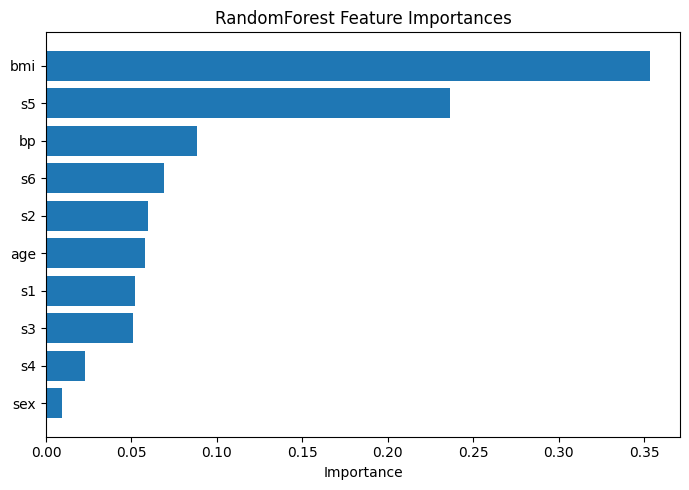

,feature,importance
2,bmi,0.353246
8,s5,0.236397
3,bp,0.088485
9,s6,0.068979
5,s2,0.059566
0,age,0.057964
4,s1,0.052122
6,s3,0.050881
7,s4,0.023055
1,sex,0.009305


In [6]:

# Feature importances from RandomForest
importances = rf.feature_importances_
imp_df = pd.DataFrame({"feature": X.columns, "importance": importances}).sort_values("importance", ascending=False)
plt.figure(figsize=(7,5))
plt.barh(imp_df["feature"], imp_df["importance"])
plt.gca().invert_yaxis()
plt.title("RandomForest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
imp_df


**TL;DR — Conclusions:**

1) What we predicted: a diabetes disease-progression score (regression) from 10 clinical features.

2) Clean data: no missing values; features are already standardized, which suits linear models.

3) What matters most: BMI is the strongest signal, followed by serum marker s5 and blood pressure (bp).
(Random-Forest importances put them at the top; correlations tell the same story.)

4) Best baseline: a scaled Linear Regression actually beat the more complex models on this small tabular dataset.